# Linear to Logistic Regression

## Objectives

- Describe conceptually the need to move beyond linear regression
- Explain the form of logistic regression

## Classification in Data Science: Predicting a Categorical Response

![machine learning overview - now on to classification!](images/machinelearning-classification.png)

**Classification techniques** are an essential part of machine learning and data mining applications. ***Most problems in Data Science are classification problems.***

We will focus on *binary* classification problems for the rest of this phase, answering the question: "Is it ___ or not?"

## Let's Explore

Why do we need to introduce classification techniques?

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

# Ignoring 'setting with copy' warnings
import warnings
warnings.filterwarnings('ignore')

Here we have a dataset about glass. Information [here](https://archive.ics.uci.edu/ml/datasets/glass+identification).

Our goal: identify the type of glass - specifically, we'll create below a binary column called 'household type', which identifies the glass which is used in household items (as opposed to building windows or vehicles).

In [2]:
# glass identification dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','household type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass['household type'] = np.where(glass['household type'] <=3, 0, 1) # cleaning our target

# Just grab one predictor and our target
# 'al' is the amount of aluminum content, household type is whether the glass is household glass
df = glass[['al', 'household type']]
df.head()

,al,household type
id,,
1,1.10,0
2,1.36,0
3,1.54,0
4,1.29,0
5,1.24,0


Let's visualize the relationship between our predictor and our target:

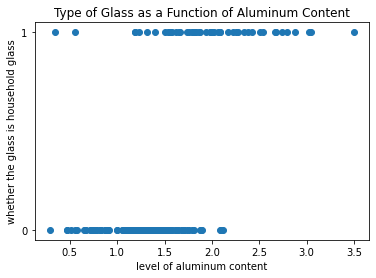

In [3]:
fig, ax = plt.subplots()
ax.scatter(df['al'], df['household type'])

ax.set_yticks([0,1])
ax.set_xlabel('level of aluminum content')
ax.set_ylabel('whether the glass is household glass')
ax.set_title('Type of Glass as a Function of Aluminum Content');

### Using Simple Linear Regression

Let's draw a **regression line** to predict our target:

In [4]:
# fit a linear regression model and store the predictions as a column
X = df[['al']]
y = df['household type']

linreg = LinearRegression()
linreg.fit(X, y)

df['preds'] = linreg.predict(X)

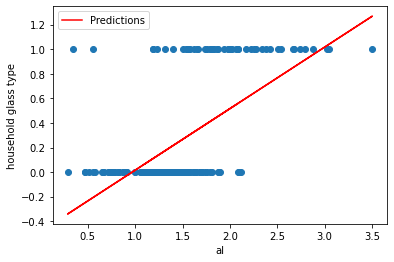

In [5]:
# scatter plot that includes the regression line

fig, ax = plt.subplots()
ax.scatter(df['al'], df['household type'])
ax.plot(df['al'], df['preds'], color='red', label='Predictions')
ax.set_xlabel('al')
ax.set_ylabel('household glass type')
ax.legend();

You can see that this doesn't make a lot of sense. This straight line cannot grasp the true structure of what is going on when using a linear regression model. Now, without going into the mathematical details for now, let's look at a logistic regression model and fit that to the dataset.

In [6]:
# fit a logistic regression model and store the predictions as a column

logreg = LogisticRegression()
logreg.fit(X, y)

df['logreg_preds'] = logreg.predict(X)

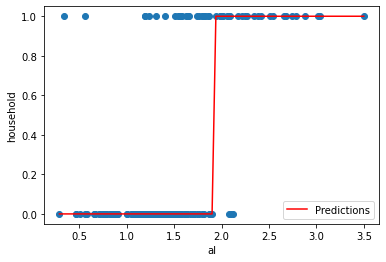

In [7]:
fig, ax = plt.subplots()
df = df.sort_values(by='al') # sorting so the plot renders correctly
ax.scatter(df['al'], df['household type'])
ax.plot(df['al'], df['logreg_preds'], color='red', label='Predictions')
ax.set_xlabel('al')
ax.set_ylabel('household')
ax.legend();

#### Discuss the new shape:

You can see that this function has an S-shape which plateaus to 0 in the left tail and 1 to the right tail. This is exactly what we needed here!

That **S-shape** is what's known as a **sigmoid function**

![sigmoid](images/SigmoidFunction_701.gif)

## Logistic Regression Model

As you might remember, a _linear_ regression model can be written as:

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2, x_2 +\ldots + \beta_n x_n $$

When there are $n$ predictors $x_1,\ldots,x_n$ and $n+1$ parameter estimates that are estimated by the model $\hat\beta_0, \hat\beta_1,\ldots, \hat\beta_n$. $ \hat y $ is an estimator for the outcome variable.

Translating this model formulation to our example, this boils down to:

$$ \text{household glass} = \beta_0 + \beta_1 \text{aluminum content} $$

When you want to apply this to a binary target, what you actually want to do is perform a **classification** of your data in one group versus another one. In our case, we want to classify our observations as either "household glass type" or "not household glass type". A classification model will guess what the **probability** is of belonging to one group versus another. And that is exactly what logistic regression models can do! 

### Transformation

Essentially, what happens is, the linear regression is *transformed* in a way that the outcome takes a value between 0 and 1. This can then be interpreted as a probability (e.g., 0.2 is a probability of 20%). Applied to our example, the expression for a logistic regression model would look like this:

$$ P(\text{household glass}) = \displaystyle \frac{1}{1+e^{-(\hat \beta_0+\hat \beta_1 \text{aluminum content})}}$$

Note that the outcome is written as $P(\text{household glass})$. This means that the output should be interpreted as *the probability that glass is of the type 'household'*.

In other words, the outcome variable should be interpreted as *the **probability** of the class label being equal to 1*.

### Specifics - with a side of more math

#### What are the odds?

<img src="images/odds.png" width=500>

For example, for an event with probability of 0.75, the odds of the event is:


$$\frac{0.75}{1 - 0.75} = \frac{0.75}{0.25} = 3$$

#### Specifically, we're modeling the LOG odds

> Reminder: what are logs again? 
> $$ 2^4 = 16$$ $$\log_2(16) = 4$$

The values of odds range from 0 to infinity. When the value is less than 1, the odds are in favor of event not occuring; however, when odds is greater than, they are in favor of the events occuring. This poses a problem--the asymmetry. Therefore, we use the **log** of the odds to fix the asymmetry.

Log(0.75/(1-0.75)) = 1.09

Log(0.25/(1-0.25)) = -1.09

#### The Point

Under the hood, logistic regression is a linear regression function, but the target is now the log odds of our binary outcome category. The result that we get out from logistic regression is a number between 0 and 1, a number I can naturally interpret as **the probability of our 1 class** (as in, probability that the output is 1). If I truly want a binary prediction, I can simply round the probability to then output either 0 or 1 (which sklearn's logistic regression function does for us!).

### Back to Glass:

In [8]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,household type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


Let's go beyond a simple logistic regression, and use all of these variables to predict household type!

BUT we need to scale first! If we check out the documentation, we'll see that SKLearn's Logistic Regression function applies regularization by default - meaning we need to scale our inputs or else we'll unfairly penalize some coefficients!

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [9]:
# Define our X and y

X = glass.drop(columns='household type')
y = glass['household type']

In [10]:
# First, train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=2022)

In [11]:
# Instantiate our scaler
scaler = StandardScaler()

# Fit our scaler
scaler.fit(X_train)

# Transform train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Now, time to model!

# Instantiate our Logistic Regression model
# We can explore and discuss the documentation - should we adjust any arguments?
logreg = LogisticRegression()

# Fit our model to the scaled data
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [13]:
# Let's use the default scorer to explore results!
logreg.score(X_train_scaled, y_train)

0.93125

In [14]:
logreg.score(X_test_scaled, y_test)

1.0

In [15]:
# Now let's grab the predictions out
logreg.predict(X_train_scaled)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0])

In [16]:
# Check out predict_proba:
logreg.predict_proba(X_train_scaled)

array([[9.16713232e-04, 9.99083287e-01],
       [9.97673798e-01, 2.32620167e-03],
       [6.87087660e-01, 3.12912340e-01],
       [8.80298952e-01, 1.19701048e-01],
       [9.83382318e-01, 1.66176816e-02],
       [9.71374628e-01, 2.86253724e-02],
       [9.96940357e-01, 3.05964303e-03],
       [9.95077213e-01, 4.92278658e-03],
       [9.82510616e-01, 1.74893836e-02],
       [2.10227368e-03, 9.97897726e-01],
       [9.90486982e-01, 9.51301802e-03],
       [9.96034005e-01, 3.96599538e-03],
       [3.96029896e-01, 6.03970104e-01],
       [3.25022461e-01, 6.74977539e-01],
       [9.56876976e-01, 4.31230237e-02],
       [9.72020962e-01, 2.79790375e-02],
       [9.65433447e-01, 3.45665532e-02],
       [4.40723743e-03, 9.95592763e-01],
       [4.15924666e-02, 9.58407533e-01],
       [9.66312060e-01, 3.36879403e-02],
       [6.58441630e-04, 9.99341558e-01],
       [9.95064758e-01, 4.93524174e-03],
       [9.80712475e-01, 1.92875255e-02],
       [9.77728559e-01, 2.22714412e-02],
       [9.849230

#### About `predict_proba`:

[Documentation Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba)

Basically: we have a column for each class in our target, and the number is the calculated probability estimate of each class for that row! Typically, we want to explore the probability of the `1` class (the target we're searching for)

In [18]:
# Let's make a dataframe to explore our predictions

tr_outcomes = pd.DataFrame(y_train).rename(columns={'household type':'Actual Value'})

tr_outcomes['Predicted Value'] = logreg.predict(X_train_scaled)
tr_outcomes['Predicted Probability of 1'] = logreg.predict_proba(X_train_scaled)[:,1]

tr_outcomes.head(10)

,Actual Value,Predicted Value,Predicted Probability of 1
id,,,
198,1,1,0.999083
104,0,0,0.002326
130,0,0,0.312912
102,0,0,0.119701
31,0,0,0.016618
135,0,0,0.028625
69,0,0,0.003060
70,0,0,0.004923
66,0,0,0.017489


#### Discuss:

- 


### Interpretting coefficients

This result, in combination with mathematical properties of exponential functions, leads to the fact that, applied to our example:

> if *aluminum content* goes up by 1, the odds are multiplied by $e^{\beta_1}$

In our example, if there is a positive relationship between aluminum content and glass type, this will lead a positive $\beta_1 > 0$, so $e^{\beta_1}>1$, and the odds will increase as *aluminum content* increases.

In [19]:
# Check out the coefficients from our model
logreg.coef_

array([[ 0.57287052,  0.82074492, -1.41441348,  1.8486297 ,  1.0371649 ,
         0.01533583, -0.015433  ,  0.34484762, -0.46222101]])

In [21]:
# Zip them: need to access the 0th element of the coef_ argument
dict(zip(X_train.columns, logreg.coef_[0]))

{'ri': 0.5728705158695453,
 'na': 0.8207449166195825,
 'mg': -1.4144134778639914,
 'al': 1.848629695728895,
 'si': 1.0371648969368001,
 'k': 0.015335834499644412,
 'ca': -0.015432996262460526,
 'ba': 0.34484762136849856,
 'fe': -0.46222101496181933}

#### Interpret:

- 


### Assumptions ... should feel familiar

- The independent variables should be linearly related to the log odds
    - AKA we expect a linear relationship
- The input variables should be independent of each other
    - AKA the model should have little or no multicollinearity
- For a binary logistic regression, the factor level 1 of the dependent variable should represent the desired outcome
    - AKA the `1` class in the target column should always represent the thing you're trying to find
- For a binary logistic regression, the dependent variable should be dichotomous in nature
    - AKA the target column should be mutually exclusive
    
[Reference](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/)

----

## Level Up:  Deeper Dive:

As mentioned before, the probability of identifying household glass can be calculated using:

$$ P(\text{household glass}) = \displaystyle \frac{1}{1+e^{-(\hat \beta_0+\hat \beta_1 \text{aluminum content})}}$$

You can show that, by multiplying both numerator and denominator by $e^{(\hat \beta_0+\hat \beta_1 \text{aluminum content})}$


$$ P(\text{household glass}) = \displaystyle \frac{e^{\hat \beta_0+\hat \beta_1 \text{aluminum content}}}{1+e^{\hat \beta_o+\hat \beta_1 \text{aluminum content}}}$$

As a result, you can compute $P(\text{NOT household glass})$ as:

$$ P(\text{NOT household glass} ) = 1- \displaystyle \frac{e^{\hat \beta_0+\hat \beta_1 \text{aluminum content}}}{1+e^{\hat \beta_o+\hat \beta_1 \text{aluminum content}}}= \displaystyle \frac{1}{1+e^{\hat \beta_0+\hat \beta_1 \text{aluminum content}}}$$



#### Odds ratio

This doesn't seem to be very spectacular, but combining these two results leads to an easy interpretation of the model parameters, triggered by the *odds*

$$ \dfrac{P(\text{household glass})}{P(\text{NOT household glass})} = e^{\hat \beta_0+\hat \beta_1 \text{aluminum}} $$

This expression can be interpreted as the *odds in favor of identifying household glass*.